In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [3]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [4]:
def get_data(filename):

    with open(filename) as training_file:
      csv_reader = csv.reader(training_file, delimiter=',')
      line_count = 0
      labels = []
      images = []

      for line in csv_reader:
        if line_count == 0:
          print("Ignore columns")
          line_count = line_count + 1
        else:
          labels.append(np.array(line[0]).astype(float))
          images.append(np.array_split(np.array(line[1:785]).astype(float),28))
    return np.array(images), np.array(labels)


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


Ignore columns
Ignore columns
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:

training_images = np.expand_dims(training_images, axis=-1)
testing_images =  np.expand_dims(testing_images, axis=-1)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip = True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale=1.0/255.0)
    

print(training_images.shape)
print(testing_images.shape)
    


(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [6]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation='softmax')]
    )

# Compile Model. 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=100),
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=50),
                              epochs=20, steps_per_epoch=len(training_images)/100, validation_steps=len(testing_images)/50)

model.evaluate(testing_images, testing_labels)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/20
275/274 [==============================] - 10s 38ms/step - loss: 2.8403 - acc: 0.1447 - val_loss: 2.1976 - val_acc: 0.2727
Epoch 2/20
275/274 [==============================] - 7s 24ms/step - loss: 2.1328 - acc: 0.3321 - val_loss: 1.4611 - val_acc: 0.5007
Epoch 3/20
275/274 [==============================] - 7s 24ms/step - loss: 1.7837 - acc: 0.4301 - val_loss: 1.1318 - val_acc: 0.6205
Epoch 4/20
275/274 [==============================] - 7s 25ms/step - loss: 1.5217 - acc: 0.5117 - val_loss: 1.1455 - val_acc: 0.5689
Epoch 5/20
275/274 [==============================] - 7s 24ms/step - loss: 1.3336 - acc: 0.5712 - val_loss: 0.8153 - val_acc: 0.7004
Epoch 6/20
275/274 [==============================] - 7s 25ms/step - loss: 1.1931 - acc: 0.6115 - val_loss: 0.7145 - val_acc: 0.7400
Epoch 7/20
275/274 [==============================] - 7s 25ms/step - loss: 1.0629 -

[6.92426086682151, 0.56609035]

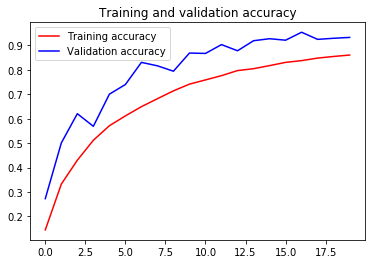

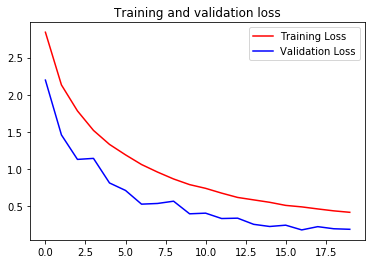

In [8]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()